<a href="https://colab.research.google.com/github/Sadnya20/Stockprediction-BI/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input,Dense,Dropout
from keras.layers import LSTM

In [4]:
df=pd.read_csv("/content/drive/MyDrive/yhills data sets/stock_data.csv")
df

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0,FB
19582,2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0,FB
19583,2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0,FB
19584,2017-11-09,178.31000,179.40000,177.09000,179.30000,12602188,0,FB


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [10]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
19581,2017-11-06,178.56,180.450,178.310,180.17,13275578,0,FB
19582,2017-11-07,180.50,180.748,179.403,180.25,12903836,0,FB
19583,2017-11-08,179.79,180.350,179.110,179.56,10467606,0,FB
19584,2017-11-09,178.31,179.400,177.090,179.30,12602188,0,FB
19585,2017-11-10,178.35,179.100,177.960,178.46,11060355,0,FB


In [9]:
df.describe(include="all")

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
count,19586,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0,19586
unique,8366,NaN,NaN,NaN,NaN,NaN,NaN,4
top,2016-05-09,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,4,NaN,NaN,NaN,NaN,NaN,NaN,8364
mean,NaN,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0,NaN
std,NaN,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0,NaN
min,NaN,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0,NaN
25%,NaN,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0,NaN
50%,NaN,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0,NaN
75%,NaN,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0,NaN


In [8]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

In [11]:
NaN=[(c,df[c].isnull().mean()*100)for c in df]
NaN=pd.DataFrame(NaN,columns=['column_name','percentage'])
NaN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Volume,0.0
6,OpenInt,0.0
7,Stock,0.0


In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [13]:
df.reset_index(inplace=True)

In [14]:
df.drop(['OpenInt'],axis=1,inplace=True)

In [15]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Stock
0,0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,AAPL
3,3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
4,4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,AAPL


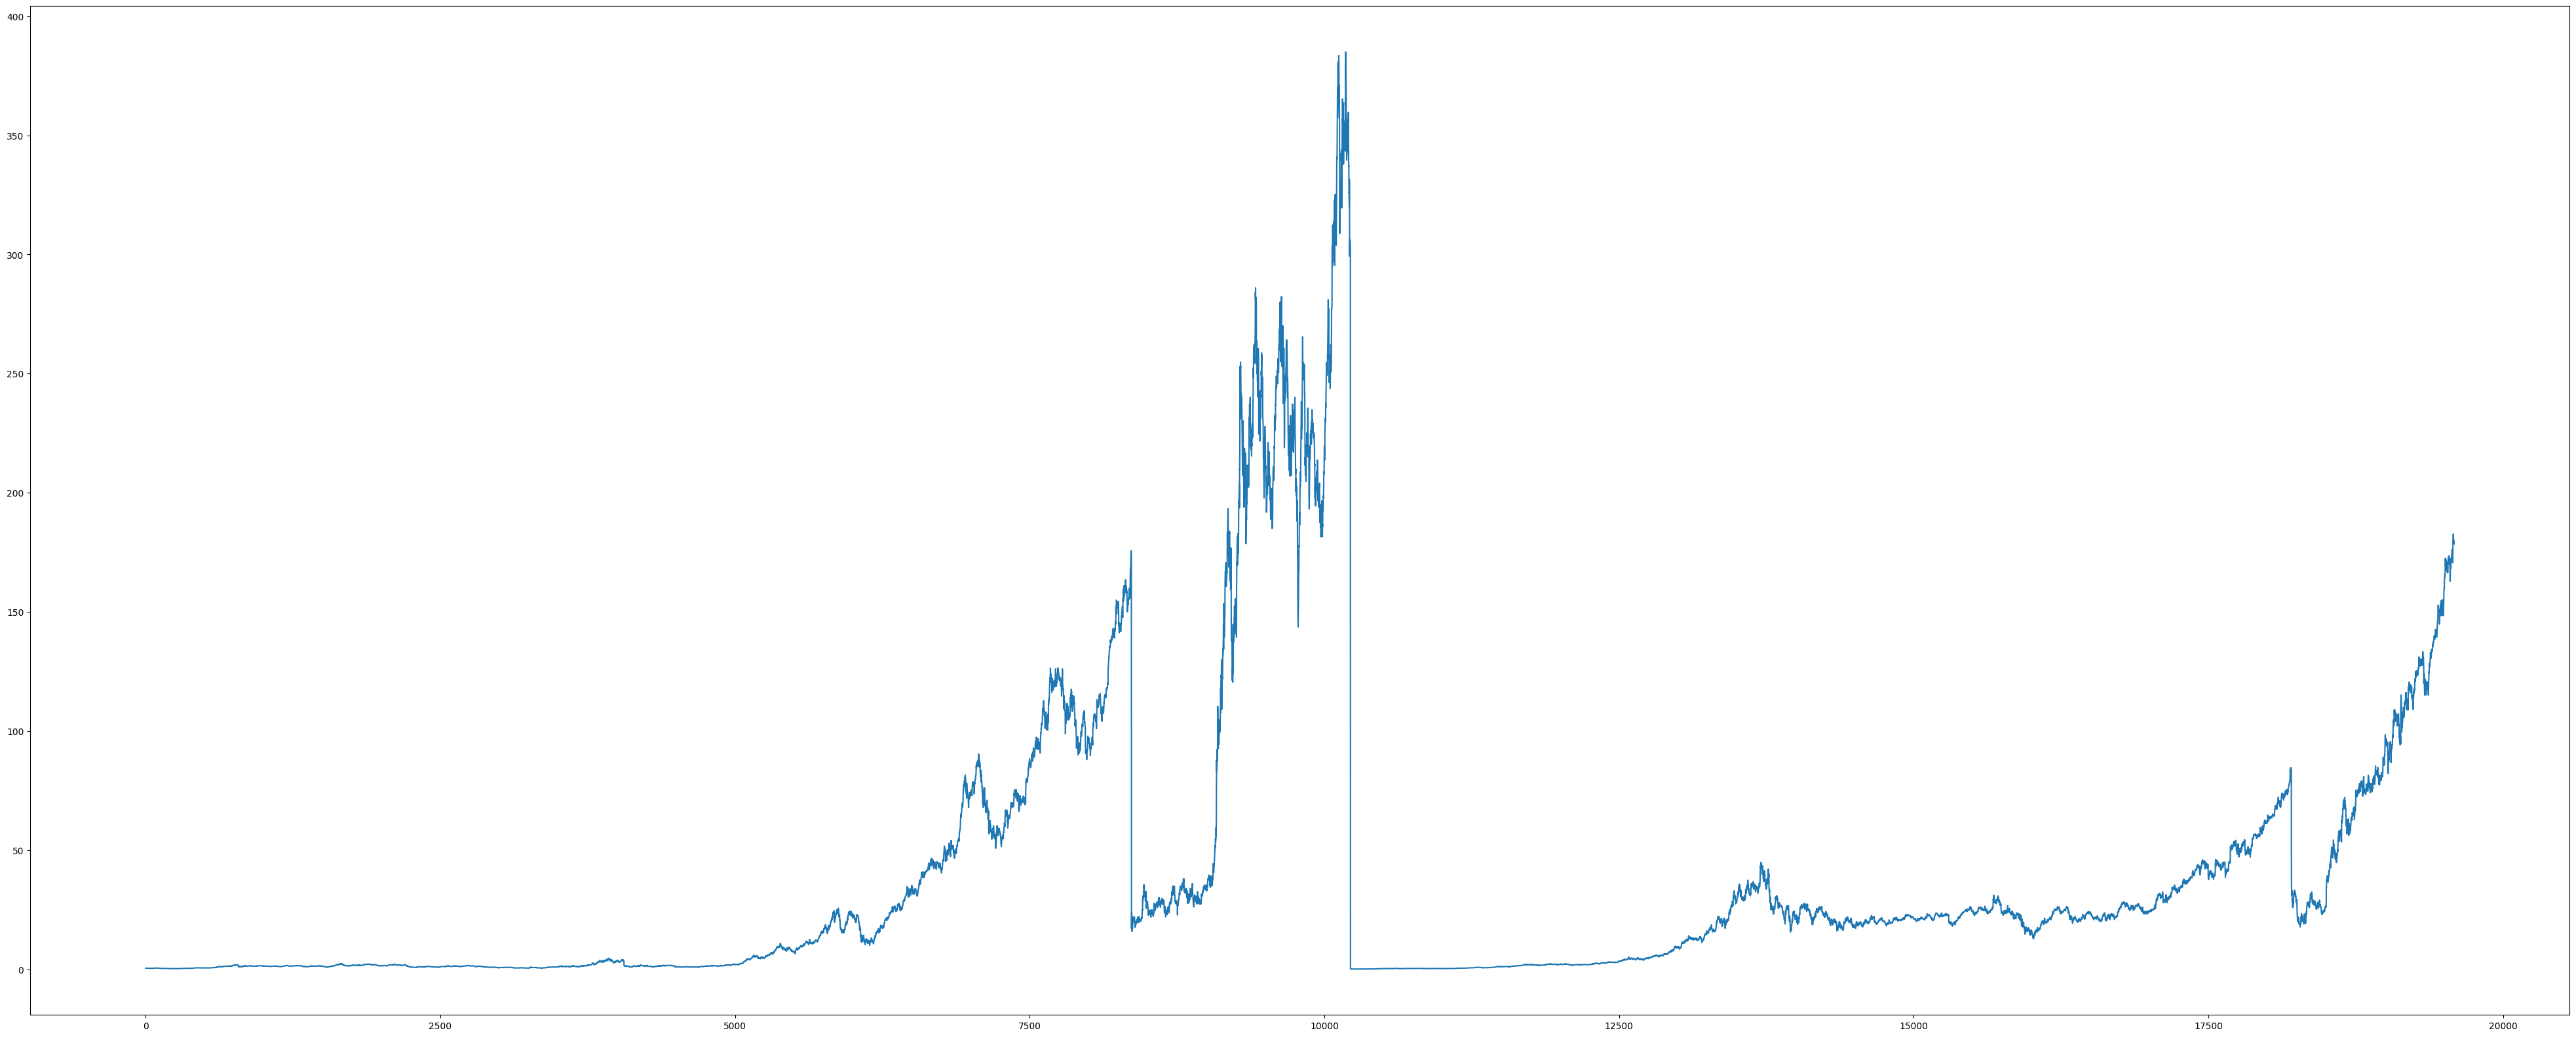

In [64]:
plt.figure(figsize=(50,20))
plt.plot(df['Close'])

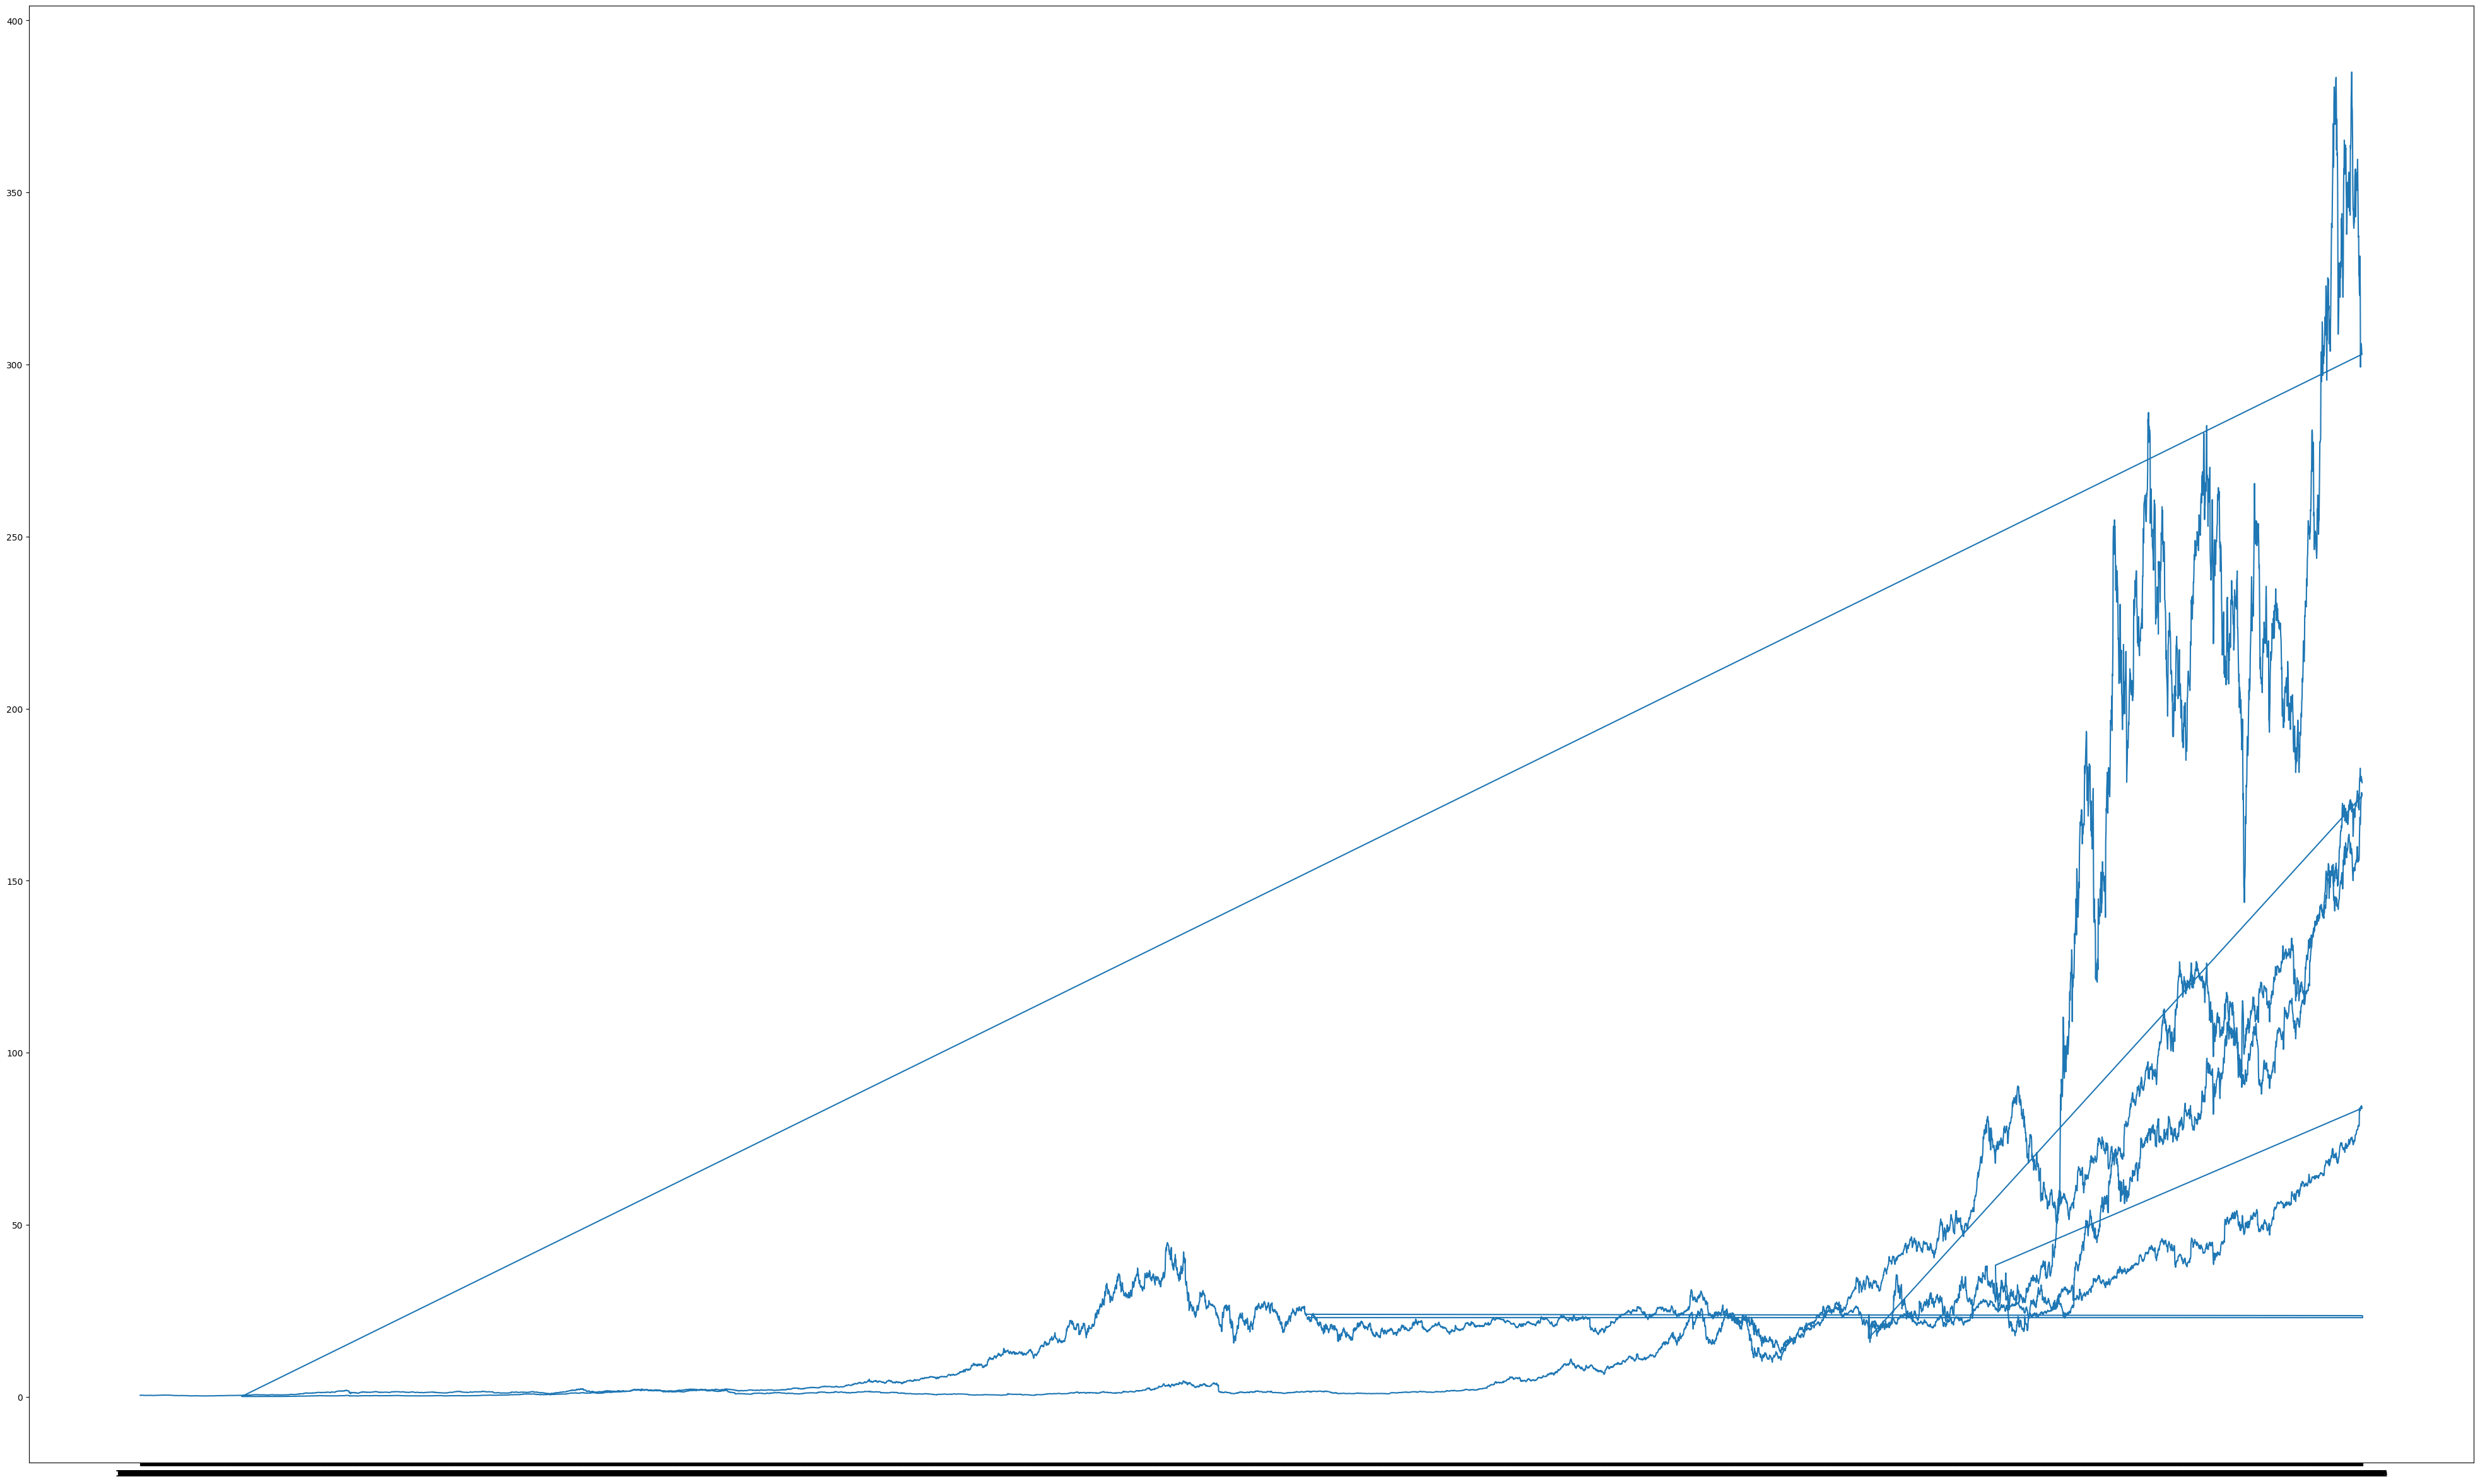

In [65]:
plt.figure(figsize=(50,30))
plt.plot(df['Date'],df['Close'])

In [17]:
Close_df=df['Close']
Close_df

0          0.42388
1          0.42134
2          0.42902
3          0.41618
4          0.43927
           ...    
19581    180.17000
19582    180.25000
19583    179.56000
19584    179.30000
19585    178.46000
Name: Close, Length: 19586, dtype: float64

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))
Close_df=scaler.fit_transform(np.array(Close_df).reshape(-1,1))
Close_df

array([[0.0009266 ],
       [0.00092   ],
       [0.00093996],
       ...,
       [0.46629645],
       [0.46562101],
       [0.46343881]])

In [20]:
train_size=int(len(Close_df)*0.6)
test_size=len(Close_df)- train_size
train_data,test_data=Close_df[0:train_size,:], Close_df[train_size:len(Close_df),:1]

In [21]:
train_data.shape

(11751, 1)

In [22]:
test_data.shape

(7835, 1)

In [23]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [24]:
time_step=100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [25]:
print(X_train.shape),print(Y_train.shape)

(11650, 100)
(11650,)


(None, None)

In [26]:
print(X_test.shape),print(Y_test.shape)

(7734, 100)
(7734,)


(None, None)

In [27]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [28]:
X_train

array([[[0.0009266 ],
        [0.00092   ],
        [0.00093996],
        ...,
        [0.00105294],
        [0.00107995],
        [0.00106624]],

       [[0.00092   ],
        [0.00093996],
        [0.0009066 ],
        ...,
        [0.00107995],
        [0.00106624],
        [0.00106624]],

       [[0.00093996],
        [0.0009066 ],
        [0.00096658],
        ...,
        [0.00106624],
        [0.00106624],
        [0.00102971]],

       ...,

       [[0.0036809 ],
        [0.00363804],
        [0.00359387],
        ...,
        [0.00501074],
        [0.00505387],
        [0.00505387]],

       [[0.00363804],
        [0.00359387],
        [0.00352919],
        ...,
        [0.00505387],
        [0.00505387],
        [0.00501074]],

       [[0.00359387],
        [0.00352919],
        [0.00363804],
        ...,
        [0.00505387],
        [0.00501074],
        [0.00505387]]])

In [29]:
X_test

array([[[0.00470576],
        [0.00466185],
        [0.0047268 ],
        ...,
        [0.0040737 ],
        [0.0040737 ],
        [0.00405162]],

       [[0.00466185],
        [0.0047268 ],
        [0.00459717],
        ...,
        [0.0040737 ],
        [0.00405162],
        [0.0041176 ]],

       [[0.0047268 ],
        [0.00459717],
        [0.00461873],
        ...,
        [0.00405162],
        [0.0041176 ],
        [0.00409526]],

       ...,

       [[0.39116646],
        [0.39695968],
        [0.39534901],
        ...,
        [0.46463383],
        [0.46463383],
        [0.46788115]],

       [[0.39695968],
        [0.39534901],
        [0.39966145],
        ...,
        [0.46463383],
        [0.46788115],
        [0.46808898]],

       [[0.39534901],
        [0.39966145],
        [0.39833654],
        ...,
        [0.46788115],
        [0.46808898],
        [0.46629645]]])

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.fit(X_train,Y_train)

365/365 [==============================] - 80s 201ms/step - loss: 0.0012


In [40]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

242/242 [==============================] - 17s 69ms/step


In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
import math
from sklearn.metrics import mean_squared_error

In [44]:
math.sqrt(mean_squared_error(Y_train,train_predict))

78.5615451826387

In [45]:
math.sqrt(mean_squared_error(Y_test,test_predict))

45.12734402729696

In [67]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=64)

Epoch 1/20
183/183 [==============================] - 50s 275ms/step - loss: 4.0606e-04 - val_loss: 3.1333e-05
Epoch 2/20
183/183 [==============================] - 58s 316ms/step - loss: 3.5404e-04 - val_loss: 5.8208e-05
Epoch 3/20
183/183 [==============================] - 46s 253ms/step - loss: 3.0237e-04 - val_loss: 2.0806e-05
Epoch 4/20
183/183 [==============================] - 50s 272ms/step - loss: 2.7708e-04 - val_loss: 9.2364e-05
Epoch 5/20
183/183 [==============================] - 44s 243ms/step - loss: 2.4432e-04 - val_loss: 5.9755e-05
Epoch 6/20
183/183 [==============================] - 45s 246ms/step - loss: 2.0630e-04 - val_loss: 3.1770e-05
Epoch 7/20
183/183 [==============================] - 44s 242ms/step - loss: 1.7245e-04 - val_loss: 1.3723e-05
Epoch 8/20
183/183 [==============================] - 43s 236ms/step - loss: 1.8024e-04 - val_loss: 3.1890e-05
Epoch 9/20
183/183 [==============================] - 45s 247ms/step - loss: 1.6015e-04 - val_loss: 2.5346e-05
E

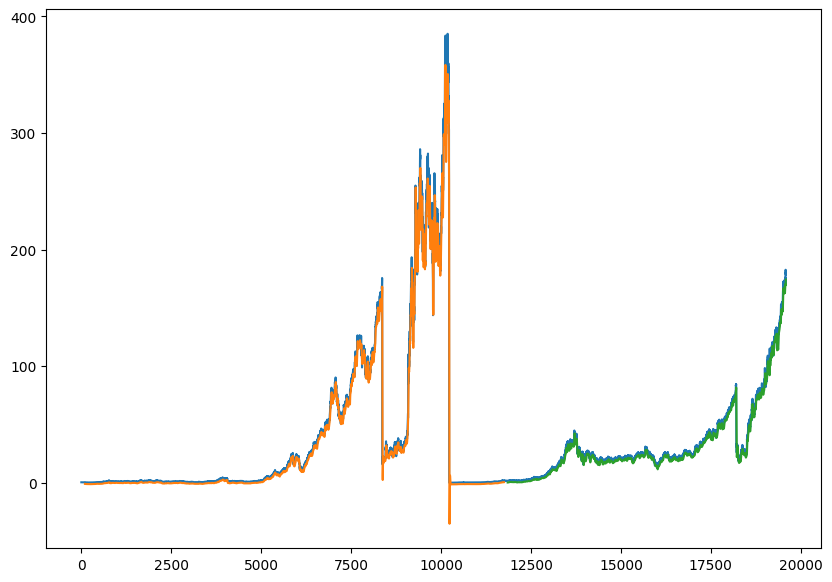

In [71]:

#shift train prediction for plotting
look_back= 100
trainPredictPlot=np.empty_like(Close_df)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testPredictPlot=np.empty_like(Close_df)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Close_df)-1,:]=test_predict
#plot baseline
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(Close_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)

7835

In [73]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 7324)

In [74]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [75]:
temp_input

[0.005271309693536118,
 0.005315473246239344,
 0.005141157105863672,
 0.005141157105863672,
 0.00501074473258709,
 0.00501074473258709,
 0.0049671007510921385,
 0.00501074473258709,
 0.004901374993245574,
 0.0052068828637102365,
 0.005293651255491868,
 0.00542406362876845,
 0.00542406362876845,
 0.005554995573253305,
 0.005620461545495734,
 0.005445885619515926,
 0.005467447824659266,
 0.005663845741386548,
 0.005533173582505829,
 0.005642283536243209,
 0.005598639554748258,
 0.005467447824659266,
 0.005467447824659266,
 0.005576038207188372,
 0.005533173582505829,
 0.005598639554748258,
 0.00572983128483725,
 0.005620461545495734,
 0.005598639554748258,
 0.005750873918772315,
 0.005837902096158082,
 0.005794777685871404,
 0.006012218236533753,
 0.006077164637567908,
 0.0062306979296126485,
 0.006187053948117697,
 0.0062306979296126485,
 0.00638267250803257,
 0.006295644330646804,
 0.006208616153261037,
 0.006295644330646804,
 0.006491522676165815,
 0.00638267250803257,
 0.006187053948

In [76]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [77]:
len(Close_df)

19586

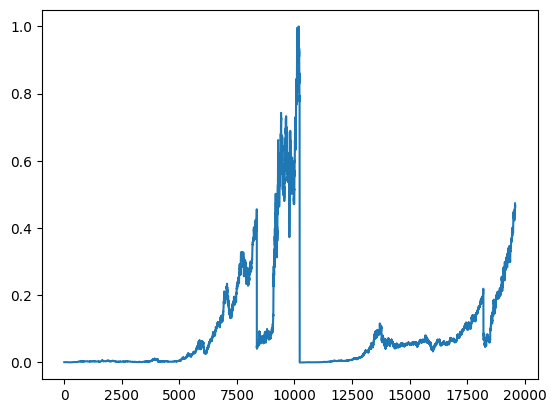

In [78]:
plt.plot(Close_df)